Finding the most recent team data file...
Loading data from: ../data/raw/nba_teams_20250317_165241.csv

--- Data Structure Examination ---
Shape: (30, 8) (rows, columns)

Columns in the dataset:
- id
- full_name
- abbreviation
- nickname
- city
- state
- year_founded
- Conference

First few records:


,id,full_name,abbreviation,nickname,city,state,year_founded,Conference
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949,East
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946,East
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970,East
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002,West
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966,East



Data Types:


id               int64
full_name       object
abbreviation    object
nickname        object
city            object
state           object
year_founded     int64
Conference      object
dtype: object


Missing Values:
No missing values found in the dataset.

--- Team Analysis ---
Categorical columns found: ['full_name', 'abbreviation', 'nickname', 'city', 'state', 'Conference']

Analyzing distribution of Conference:
Conference
East    15
West    15
Name: count, dtype: int64


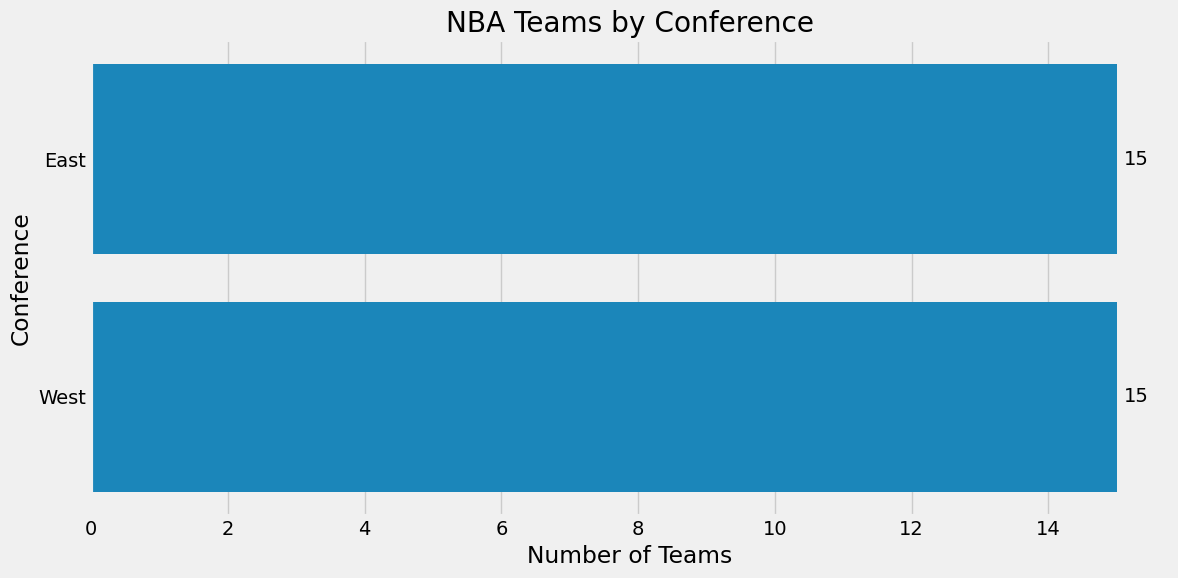


--- Numerical Analysis ---
Numerical columns found: ['id', 'year_founded']

Summary Statistics:


,id,year_founded
count,3.000000e+01,30.000000
mean,1.610613e+09,1969.700000
std,8.803408e+00,16.698441
min,1.610613e+09,1946.000000
25%,1.610613e+09,1952.000000
50%,1.610613e+09,1970.000000
75%,1.610613e+09,1979.000000
max,1.610613e+09,2002.000000


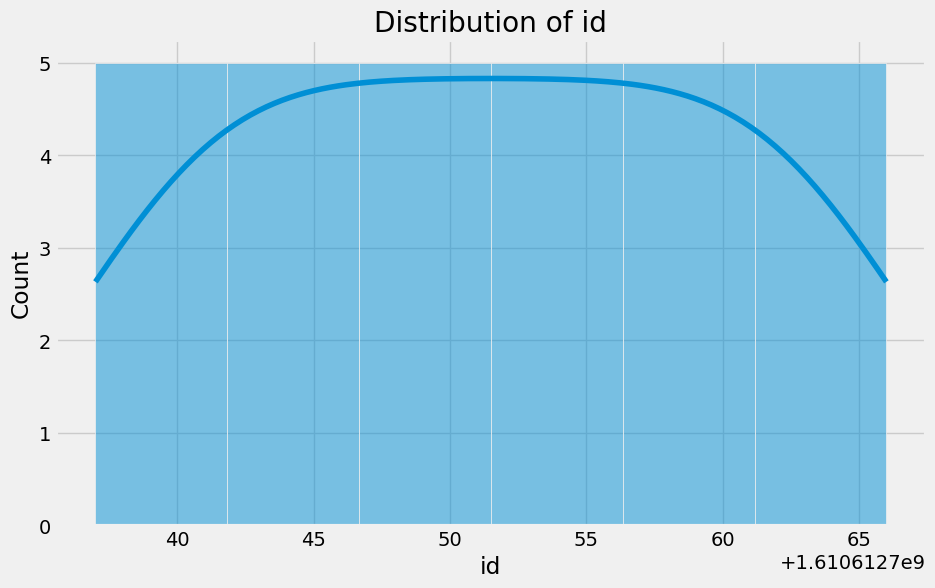

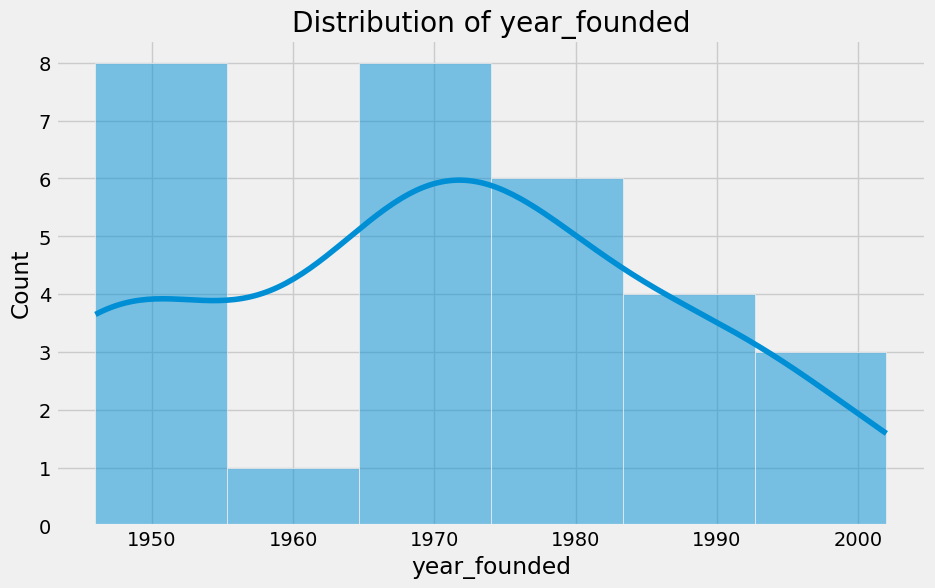


--- Key Observations ---
• Total number of teams: 30
• Number of unique Conference: 2
• Teams per Conference: {'East': 15, 'West': 15}

--- Saving Processed Data ---
Processed team data saved to ../data/processed/nba_teams_cleaned.csv

--- Next Steps ---
Based on this exploration, we should next:
1. Collect historical game data for these teams
2. Analyze team performance metrics
3. Begin designing features for our prediction models


In [1]:
# NBA Team Data Exploration
# This notebook takes a data-driven approach to exploring the NBA team data,
# first examining what columns exist and then analyzing accordingly.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
from IPython.display import display

# Set visualization style
plt.style.use('fivethirtyeight')
%matplotlib inline

# 1. Load the most recent team data file
print("Finding the most recent team data file...")
team_files = glob.glob('../data/raw/nba_teams_*.csv')

if not team_files:
    print("No team data files found! Make sure you've run collect_teams.py first.")
else:
    latest_file = max(team_files, key=os.path.getctime)
    print(f"Loading data from: {latest_file}")
    
    # Load the data
    teams_df = pd.read_csv(latest_file)
    
    # 2. Data Structure Examination
    print("\n--- Data Structure Examination ---")
    print(f"Shape: {teams_df.shape} (rows, columns)")
    
    print("\nColumns in the dataset:")
    for col in teams_df.columns:
        print(f"- {col}")
    
    print("\nFirst few records:")
    display(teams_df.head())
    
    # Check data types
    print("\nData Types:")
    display(teams_df.dtypes)
    
    # Check for missing values
    print("\nMissing Values:")
    missing = teams_df.isnull().sum()
    if missing.sum() > 0:
        display(missing[missing > 0])  # Only show columns with missing values
    else:
        print("No missing values found in the dataset.")
    
    # 3. Dataset-driven visualization
    print("\n--- Team Analysis ---")
    
    # Identify categorical columns for analysis
    categorical_cols = teams_df.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns found: {categorical_cols}")
    
    # Dynamically analyze categorical columns
    for col in categorical_cols:
        if teams_df[col].nunique() < 15:  # Only visualize if there aren't too many unique values
            print(f"\nAnalyzing distribution of {col}:")
            # Count values
            value_counts = teams_df[col].value_counts()
            print(value_counts)
            
            # Visualize
            plt.figure(figsize=(12, 6))
            ax = sns.countplot(y=col, data=teams_df, order=value_counts.index)
            plt.title(f'NBA Teams by {col}')
            plt.xlabel('Number of Teams')
            plt.tight_layout()
            
            # Add count labels
            for i, count in enumerate(value_counts):
                ax.text(count + 0.1, i, str(count), va='center')
                
            plt.show()
    
    # 4. Numerical Analysis (if numerical columns exist)
    numerical_cols = teams_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if numerical_cols:
        print("\n--- Numerical Analysis ---")
        print(f"Numerical columns found: {numerical_cols}")
        
        # Summary statistics
        print("\nSummary Statistics:")
        display(teams_df[numerical_cols].describe())
        
        # Visualize distributions if there are meaningful numerical columns
        if len(numerical_cols) > 0:
            for col in numerical_cols:
                plt.figure(figsize=(10, 6))
                sns.histplot(teams_df[col], kde=True)
                plt.title(f'Distribution of {col}')
                plt.show()
    
    # 5. Summary Statistics and Observations
    print("\n--- Key Observations ---")
    print(f"• Total number of teams: {len(teams_df)}")
    
    # Dynamically report on categorical columns
    for col in categorical_cols:
        if teams_df[col].nunique() < 15:  # Only for columns with reasonable number of categories
            print(f"• Number of unique {col}: {teams_df[col].nunique()}")
            print(f"• Teams per {col}: {teams_df.groupby(col).size().to_dict()}")
    
    # 6. Save processed team data for future use
    print("\n--- Saving Processed Data ---")
    # Ensure processed directory exists
    os.makedirs('../data/processed', exist_ok=True)
    # Save to processed folder
    processed_path = '../data/processed/nba_teams_cleaned.csv'
    teams_df.to_csv(processed_path, index=False)
    print(f"Processed team data saved to {processed_path}")
    
    # 7. Next Steps
    print("\n--- Next Steps ---")
    print("Based on this exploration, we should next:")
    print("1. Collect historical game data for these teams")
    print("2. Analyze team performance metrics")
    print("3. Begin designing features for our prediction models")